---

# Decision Trees, Visualizing Decision Boundaries, and Evaluation

A decision tree is a type of non-parametric supervised learning that can be used for both regression and classification. In this notebook we explore classification decision trees on an artificial dataset. 

....


---

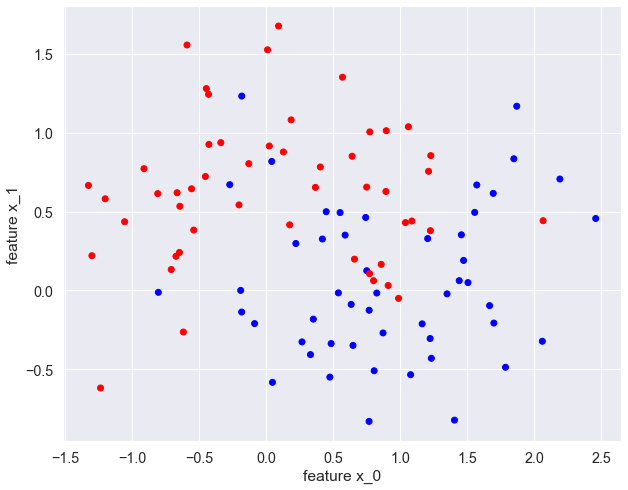

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# The artificial data will be taken from sklearn (make_moons)
from sklearn.datasets import make_moons

X, y = make_moons(noise = 0.40, random_state=3)
colors = ["red" if label == 0 else "blue" for label in y]


plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("feature x_0")
plt.ylabel("feature x_1")
plt.show()

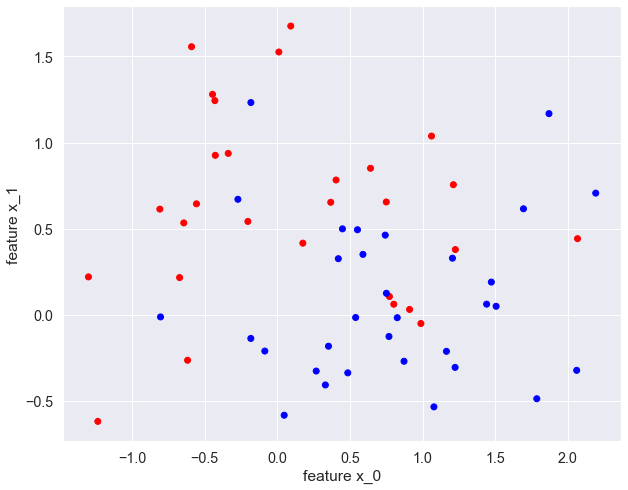

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

c_train = ["red" if label == 0 else "blue" for label in y_train]
c_test = ["red" if label == 0 else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("feature x_0")
plt.ylabel("feature x_1")
plt.show()

In [45]:
features = ["x_0", "x_1"]
labels = ["red", "blue"]

---

We will use the DecisionTreeClassifier from sklearn. Documentation can be found at: [tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)

---

In [46]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

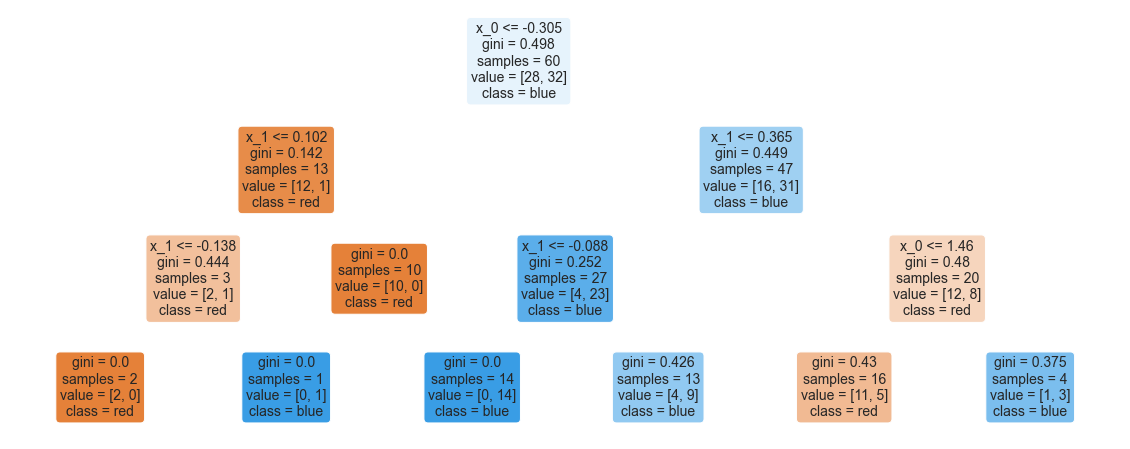

In [47]:
from sklearn import tree

plt.figure(figsize=(20, 8))
a = tree.plot_tree(decision_tree,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

In [48]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = features)
print(tree_rules)

|--- x_0 <= -0.30
|   |--- x_1 <= 0.10
|   |   |--- x_1 <= -0.14
|   |   |   |--- class: 0
|   |   |--- x_1 >  -0.14
|   |   |   |--- class: 1
|   |--- x_1 >  0.10
|   |   |--- class: 0
|--- x_0 >  -0.30
|   |--- x_1 <= 0.36
|   |   |--- x_1 <= -0.09
|   |   |   |--- class: 1
|   |   |--- x_1 >  -0.09
|   |   |   |--- class: 1
|   |--- x_1 >  0.36
|   |   |--- x_0 <= 1.46
|   |   |   |--- class: 0
|   |   |--- x_0 >  1.46
|   |   |   |--- class: 1



---

In the following code cell we show the decision boundaries from our trained tree.....

---

Text(0, 0.5, 'feature: x_1')

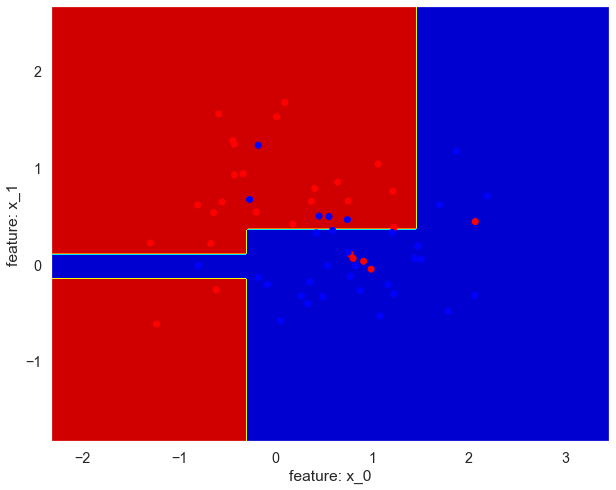

In [49]:
# Set a plot_step
plot_step = 0.02


plt.figure(figsize=(10, 8))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

#plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='jet_r')

plt.scatter(X_train[:, 0], X_train[:, 1], c=c_train)
plt.xlabel("feature: x_0")
plt.ylabel("feature: x_1")

---

## The Confusion Matrix.

In many instances we are interested in the following:
 * true positives -> predicted true and actually true
 * false positives -> predicted true and not actually true
 * false negatives -> predicted false but actually true
 * true negatives -> predicted false and actually false

All of these possibilities are contained in the confusion matrix. 

---

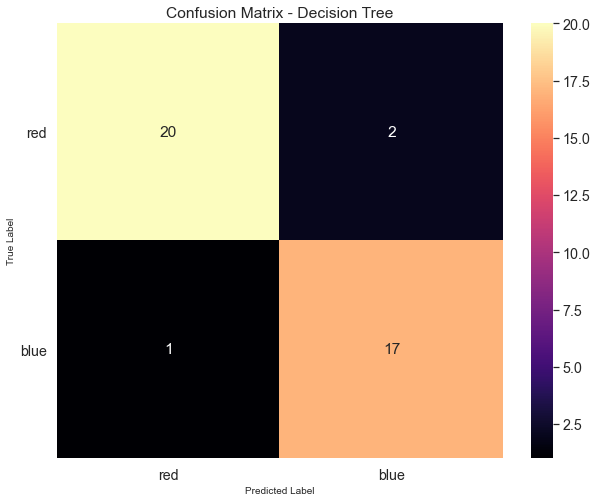

In [50]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma")

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=10)
ax.set_yticklabels(labels, rotation=0)
plt.show()

Text(0, 0.5, 'feature: x_1')

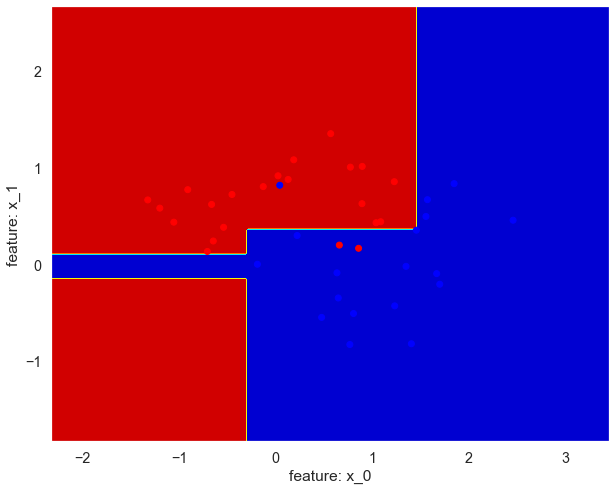

In [51]:
# Set a plot_step
plot_step = 0.02


plt.figure(figsize=(10, 8))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

#plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='jet_r')

plt.scatter(X_test[:, 0], X_test[:, 1], c=c_test)
plt.xlabel("feature: x_0")
plt.ylabel("feature: x_1")

In [52]:
print(f"accuracy score = {metrics.accuracy_score(y_test, test_pred_decision_tree)}")

accuracy score = 0.925


Precision tell us how many of the values we predicted to be in a certain class are actually in that class!

In [53]:
print(f"precision score")

precision = metrics.precision_score(y_test, 
                                    test_pred_decision_tree,
                                   average = None)

precision_results = pd.DataFrame(precision, index=labels)
precision_results.rename(columns={0:"precision"}, inplace=True)
precision_results

precision score


,precision
red,0.952381
blue,0.894737


In [54]:
# Recall and the f1-score (look them up!)

print(metrics.classification_report(y_test, test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.89      0.94      0.92        18

    accuracy                           0.93        40
   macro avg       0.92      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40



---

**Improving the model.**
We can try to improve the model by changing the features used, but we can also see how it responds to changes in hyperparameters by using GridSearchCV. This performs cross validation on the model by performing the algorithm on multiple runs of the sets of the training set, and tells us how the model responds.
For our purpose, we can change the max_depth and min_samples_split parameters which control how deep the tree goes, and the number of samples required to split an internal node.


---

In [55]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': [1,2,3,4,5], 
                     'min_samples_split': [2,4,6,8,10]}]
scores = ['recall']
for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    dtc = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters,
        scoring = f'{score}_macro'
    )
    dtc.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(dtc.best_params_)
    print()
    print("Grid scores on development set:")
    means = dtc.cv_results_["mean_test_score"]
    stds = dtc.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 dtc.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_depth': 2, 'min_samples_split': 2}

Grid scores on development set:
0.595 (+/-0.195) for {'max_depth': 1, 'min_samples_split': 2}
0.595 (+/-0.195) for {'max_depth': 1, 'min_samples_split': 4}
0.595 (+/-0.195) for {'max_depth': 1, 'min_samples_split': 6}
0.595 (+/-0.195) for {'max_depth': 1, 'min_samples_split': 8}
0.595 (+/-0.195) for {'max_depth': 1, 'min_samples_split': 10}
0.698 (+/-0.267) for {'max_depth': 2, 'min_samples_split': 2}
0.698 (+/-0.267) for {'max_depth': 2, 'min_samples_split': 4}
0.698 (+/-0.267) for {'max_depth': 2, 'min_samples_split': 6}
0.698 (+/-0.267) for {'max_depth': 2, 'min_samples_split': 8}
0.698 (+/-0.267) for {'max_depth': 2, 'min_samples_split': 10}
0.648 (+/-0.315) for {'max_depth': 3, 'min_samples_split': 2}
0.648 (+/-0.315) for {'max_depth': 3, 'min_samples_split': 4}
0.648 (+/-0.315) for {'max_depth': 3, 'min_samples_split': 6}
0.648 (+/-0.315) for {'max_depth': 

In [56]:
decision_tree = DecisionTreeClassifier(max_depth=2, min_samples_split = 2, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

Text(0, 0.5, 'feature: x_1')

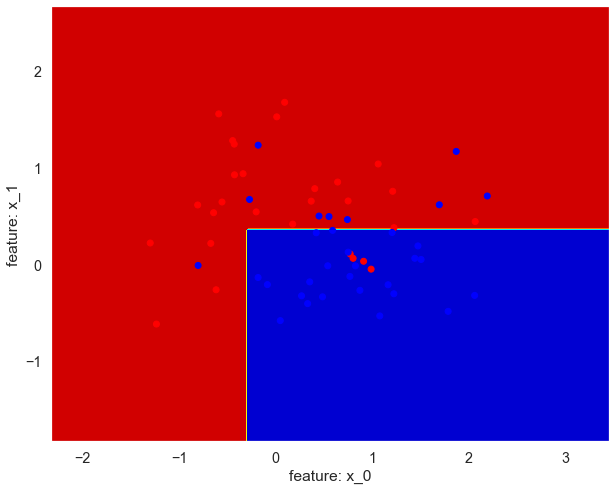

In [42]:
# Set a plot_step
plot_step = 0.02


plt.figure(figsize=(10, 8))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

#plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='jet_r')

plt.scatter(X_train[:, 0], X_train[:, 1], c=c_train)
plt.xlabel("feature: x_0")
plt.ylabel("feature: x_1")